# Example 12: Calculation of specific heat

In this example, the specific hear for Cu is calculated using a combination of free energy calculation and temperature sweep.

The EAM potential we will use is : [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

The calculation block gives the input conditions at which the calculation is carried out. First of all, the `mode` is `ts`, a temperature sweep over the temperature range given in the `temperature` keyword will be done. 

The calculation can be run by,
```
calphy -i input.yaml
```
calculation. In this case, its 0 as we ran only a single loop (see `n_iterations`). 

The variation of the free energy within the temperature range is given in the `temperature_sweep.dat` files in the simulation folder. The file contains three columns, temperature, free energy and the error in free energy. The files are read in and plotted below.

We start with imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

And some constants which we will use later,

In [2]:
ev_to_j = sc.physical_constants["electron volt-joule relationship"][0]
Av =  sc.physical_constants["Avogadro constant"][0]
A_to_m = 1E-10
kB = sc.physical_constants["Boltzmann constant"][0]

In [3]:
temp, fe, err = np.loadtxt("ts-fcc-solid-400-0/temperature_sweep.dat", unpack=True)

## Calculation of $c_p$ from free energy

The first step is to calculate the entropy from free energy using the following equation,  

$$
-S = \bigg ( \frac{dG}{dT} \bigg )_p
$$

Then differentiating once more provides the specific heat,  

$$
c_p = T\bigg ( \frac{dS}{dT} \bigg )_p
$$

We start by calculating the entropy by taking the gradient, converting it to J/mol K. But before that, we will fit the free energy to a polynomial so that taking gradients is easier. In this case, we will use a fifth order polynomial.

In [63]:
fe_fit_fn = np.polyfit(temp, fe, 5)

Now we take the derivative of the free energy with respect to the temperature. 

In [69]:
entropy_fn = -np.polyder(fe_fit_fn, m=1)*ev_to_j/(1/Av)

Now we use this equation:

$$
c_p = T\bigg ( \frac{dS}{dT} \bigg )_p
$$

to calculate the specific heat

In [70]:
cp_fn = np.polyder(entropy_fn, m=1)

Evaluating this polynomial gives the specific heat

In [71]:
cp_temp = np.polyval(cp_fn, temp)

Note that we calculated:

$$
\frac{c_p}{T} = \bigg ( \frac{dS}{dT} \bigg )_p
$$

Note the division by $T$. The reason for this is to reduce the noise in our calculation when comparing with experimental results. Note that if a longer switching time and system size is used, we can use the actual equation. For more details see [Fig. 4 in Ref](https://journals.aps.org/prmaterials/abstract/10.1103/PhysRevMaterials.5.103801).

In order to compare our results, we plot it together with some experimental values from [Ref](https://doi.org/10.1063/1.555728).

In [74]:
exp_temp = [400, 450, 500, 550, 600, 650, 700, 800,900,1000, 1100, 1200]
exp_cp = [25.25, 25.61, 25.91, 26.21, 26.48, 26.73, 26.99, 27.48, 28.04, 28.66, 29.48, 30.53]

Finally the plot

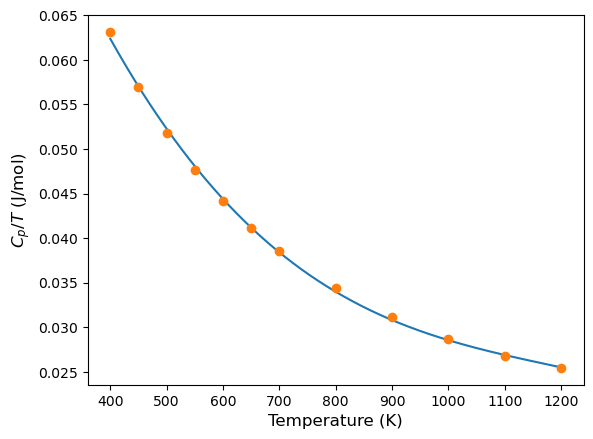

In [76]:
plt.plot(temp, cp_temp)
plt.plot(exp_temp, np.array(exp_cp)/np.array(exp_temp), 'o')
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel(r"$C_p/T$ (J/mol)", fontsize=12)

We can see that there is good agreement between the two values.